In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd
import scipy
import numpy
import sklearn
from IPython.display import display
import plotly.plotly as py
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

import plotly
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')
# interact(f, x=widgets.IntSlider(min=1892,max=2016,step=4,value=2000));
number_failed=0
height3_list=[]
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import base64
import time
import random
from selenium.webdriver.common.action_chains import ActionChains
driver = webdriver.PhantomJS()

# Read CSV 

In [270]:
OL_df = pd.read_csv('data/SwimmerOL.csv')
WC_df = pd.read_csv('data/SwimmerWC.csv')
del OL_df['Unnamed: 0']
del WC_df['Unnamed: 0']
DF =pd.concat([OL_df,WC_df])
DF['Distance'] = DF['Event'].apply(lambda x: int(x.split('m')[0]))
DF['Stroke'] = DF['Event'].apply(lambda x: x.replace('metre','m').split('m')[1][1:])
del DF['weight_kg']
del DF["DOB"]
del DF['weight_lbs']

# Fix age

In [360]:
d1 = DF

age3_list  =[]
for y,i in enumerate(d1['DOB1']):
    p=pd.to_datetime(d1['Year'].iloc[y],format = '%Y') + pd.Timedelta(8,'M')
    try:
        if int(str(p-pd.to_datetime(i)).split(" ")[0])/365.0> 14:
            age3_list.append(int(str(p-pd.to_datetime(i)).split(" ")[0])/365.0)
        else:
#             print d1['Athlete'].iloc[y], p,int(str(p-pd.to_datetime(i))[:4])/365.0
            age3_list.append('NA')
    except:
        age3_list.append('NA')
        print(d1['Athlete'].iloc[y])#, p,int(str(p-pd.to_datetime(i))[:4])/365.0



CHOROPHAS, Efstathios
ZACHARIAS, Georg
LEARY, J. Scott
DAM, Hans Peter Ludwig
JULIN, Harald S.A.
ROBINSON, William Walter
HEBNER, Harry J.
HARDWICK, Harold H.
HODGSON, George Ritchie
MALISCH, Kurt Paul
L�TZOW, Willy
HARDWICK, Harold H.
HODGSON, George Ritchie
KEALOHA, Warren Paoa
GUEST, Irene
VERNOT, George
VERNOT, George
WOODBRIDGE, Margaret
BARTHA, Istv�n
KEALOHA, Warren Paoa
WYATT, Paul
BORG, Arne
KIRSHBAUM, William
GERAGHTY, Agnes
CHARLTON, Andrew
WEISSMULLER, Johnny
BORG, Arne
EDERLE, Gertrude
NORELIUS, Martha
WYATT, Paul
COOPER, Margaret Joyce
COOPER, Margaret Joyce
BORG, Arne
M�HE, Charlotte
BARON, Mietje
BORG, Arne
IRIYE, Toshio
DAVIES, Elizabeth Valerie
MEALING, Philomenia Alecia
JACOBSEN, Else Agnes Ella
DENNIS, Clare
MAAKAL, Jenny
MADISON, Helene
KIGHT-WINGARD, Lenore
KIYOKAWA, Masaji
KIEFER, Adolph Gustav
VAN DE WEGHE, Albert
BRIDGES, Alice W.
ARENDT-JACOBS, Gisela
MEDICA, Jack C.
S�RENSEN, Inge
MEDICA, Jack C.
COWELL, Robert Elmer
RIS, Walter Stephen
FORD, Alan Robert
MITR

In [2]:
# np.isnan(DF['Age'].iloc[113]
# DF['Age']=DF['DOB2']
# 
# DF.to_csv('data/all_swimmers.csv')
# DF['Athlete'] = DF['Athlete'].apply(lambda x: x.decode('ascii','ignore').encode('ascii', 'ignore') )
DF = pd.read_csv('data/all_swimmers.csv')
# DF['DOB1'].iloc[0] is np.nan
# np.nan
# DF['Age']

In [454]:
# height3_list= []
def grab(start):
    number_failed = 0 
    for i in xrange(start,len(DF)):
#         print str(i) + ': ', 
#         print athlete_name,
        
        if DF['height'].iloc[i] is np.nan:
            athlete_name = DF['Athlete'].iloc[i]#.encode('ascii', 'ignore')
            print (athlete_name,)
            driver.get('https://www.google.com')
            search = driver.find_element_by_name('q')
            search.send_keys(athlete_name + " swimmer height")
            search.send_keys(Keys.RETURN)    
#             try:
#                 div = driver.find_element_by_css_selector('span._m3b')
#                 height = div.text
#                 print(height)
#                 DF['height'].iloc[i] = height
            try:
                div = driver.find_element_by_css_selector('span.st')
                print('wiki:' + div.text.split('Height,')[1].split('m')[0][:-1])
                DF['height'].iloc[i] = div.text.split('Height,')[1].split('m')[0][:-1]
            except:
#                 DF['height'].iloc[i] = "NA"
#                 pass
                print('no height')
        if DF['DOB1'].iloc[i] is np.nan:
            athlete_name = DF['Athlete'].iloc[i]#.encode('ascii', 'ignore')
            print (athlete_name,)
            driver.get('https://www.google.com')

            search = driver.find_element_by_name('q')
            search.send_keys(athlete_name + " swimmer DOB")
            search.send_keys(Keys.RETURN)
            driver.implicitly_wait(0.8 + 1.0*random.random())
#             try:
#                 div = driver.find_element_by_css_selector('span._m3b')
#                 DOB = div.text
#                 print (DOB)
#                 DF['DOB'].iloc[i] = DOB
#                 born_list[i]=DOB
#                 if age_list[i/] == "NA":
#                     age_list[i] = DOB
            try: # wiki
                div = driver.find_element_by_css_selector('span.st')
                print ('wiki: ' + div.text.split('born')[1].split(')')[0].split('in')[0]  )  
#                 age_list[i] =  div.text.split('born')[1].split(')')[0] 
                DF['DOB1'].iloc[i] = div.text.split('born')[1].split(')')[0].split('in')[0]
            except:
#                 age_list[i] ='NA'
                number_failed = number_failed + 1
#                 if number_failed > 20:
#                     return grab(i-20)
                print('no DOB')
        if i > 912:
            return
        
driver = webdriver.PhantomJS()
driver.implicitly_wait(0.8 + 1.0*random.random())
grab(500)

YOZAITIS, Arvidas


KeyboardInterrupt: 

In [ ]:
ind_list =[]
DOB_list = []
age_list = []
height_list = []
def grab(start):
    number_failed = 0 
    for i in xrange(start,len(DF)):

        athlete_name = DF['Athlete'].iloc[i].decode('ascii','ignore').encode('ascii', 'ignore')
        if ',' in athlete_name:
            athlete_name = athlete_name.split(', ')[1] + ' ' + athlete_name.split(',')[0].lower()
        print (athlete_name,)
#         print (athlete_name,)
        driver.get('https://www.google.com')
        search = driver.find_element_by_name('q')
        search.send_keys(athlete_name + " swimmer height")
        search.send_keys(Keys.RETURN)    
#             try:
#                 div = driver.find_element_by_css_selector('span._m3b')
#                 height = div.text
#                 print(height)
#                 DF['height'].iloc[i] = height
        try:
            div = driver.find_element_by_css_selector('span._m3b')
            height = div.text
            print(height)
            height_list.append(height)
        except:
            try:
                div = driver.find_element_by_css_selector('span.st')
                print(100*float(div.text.split('Height,')[1].split('m')[0][:-1].split('(')[-1]))
                height_list.append(100*float(div.text.split('Height,')[1].split('m')[0][:-1].split('(')[-1]))
            except:
                height_list.append('NA')
#                 DF['height'].iloc[i] = "NA"
#                 pass
                print('no height')
#         if DF['Age'].iloc[i] is np.nan :
#         athlete_name = DF['Athlete'].iloc[i]#.encode('ascii', 'ignore')
        
        driver.get('https://www.google.com')
        search = driver.find_element_by_name('q')
        search.send_keys(athlete_name + " swimmer DOB")
        search.send_keys(Keys.RETURN)
        driver.implicitly_wait(0.8 + 1.0*random.random())
        try:
            div = driver.find_element_by_css_selector('span._m3b')
            DOB = div.text
            print (DOB.split('(')[0])
            ind_list.append(i)
            DOB_list.append(DOB.split('(')[0])
            print(pd.to_datetime(DOB.split('(')[0]))
            p=pd.to_datetime(DF['Year'].iloc[i],format = '%Y') + pd.Timedelta(8,'M')
            print(int(str(p-pd.to_datetime(DOB.split('(')[0])).split(" ")[0])/365.0)
            if int(str(p-pd.to_datetime(DOB.split('(')[0])).split(" ")[0])/365.0> 14:
                age_list.append(int(str(p-pd.to_datetime(DOB.split('(')[0])).split(" ")[0])/365.0)
            else:
    #             print d1['Athlete'].iloc[y], p,int(str(p-pd.to_datetime(i))[:4])/365.0
                ag_list.append('NA')
        except:
            try:
                div = driver.find_element_by_css_selector('span.st')
                DOB = div.text
                print (DOB.split('(')[0])
                ind_list.append(i)
                DOB_list.append(DOB.split('(')[0])
                print(pd.to_datetime(DOB.split('(')[0]))
                p=pd.to_datetime(DF['Year'].iloc[i],format = '%Y') + pd.Timedelta(8,'M')
                print(int(str(p-pd.to_datetime(DOB.split('(')[0])).split(" ")[0])/365.0)
                if int(str(p-pd.to_datetime(DOB.split('(')[0])).split(" ")[0])/365.0> 14:
                    age_list.append(int(str(p-pd.to_datetime(DOB.split('(')[0])).split(" ")[0])/365.0)
                else:
        #             print d1['Athlete'].iloc[y], p,int(str(p-pd.to_datetime(i))[:4])/365.0
                    age_list.append('NA')
            except:
                ind_list.append(i)
                DOB_list.append('NA')
#                 DOB_list.apend(DOB.split('(')[0][:-1])
#                 print(d1['Athlete'].iloc[y])#, p,int(str(p-pd.to_datetime(i))[:4])/365.0
                age_list.append('NA')

#                 DF['DOB'].iloc[i] = DOB
#                 born_list[i]=DOB
#                 if age_list[i/] == "NA":
#                     age_list[i] = DOB
#             try: # wiki
#                 div = driver.find_element_by_css_selector('span.st')
#                 print ('wiki: ' + div.text.split('born')[1].split(')')[0].split('in')[0]  )  
# #                 age_list[i] =  div.text.split('born')[1].split(')')[0] 
#                 DF['DOB1'].iloc[i] = div.text.split('born')[1].split(')')[0].split('in')[0]
#             except:
# #                 age_list[i] ='NA'
#                 number_failed = number_failed + 1
# #                 if number_failed > 20:
# #                     return grab(i-20)
#                 print('no DOB')
#         if i > 212:
#             return
        
driver = webdriver.PhantomJS()
driver.implicitly_wait(0.8 + 1.0*random.random())
grab(0)

Alfred hajos
no height
February 1, 1878
1878-02-01 00:00:00
18.5917808219
Otto herschmann
no height
January 4, 1877
1877-01-04 00:00:00
19.6684931507
Efstathios chorophas
no height
1871
1871-01-01 00:00:00
25.6821917808
Paul neumann
no height
June 13, 1875
1875-06-13 00:00:00
21.2328767123
Antonios pepanos
no height
James "Jimmy" Feigen 
Zoltan halmay
no height
June 18, 1881
1881-06-18 00:00:00
19.2164383562
John Arthur jarvis
no height
February 24, 1872
1872-02-24 00:00:00
28.5369863014
Otto wahle
no height
November 5, 1879
1879-11-05 00:00:00
20.8356164384
Johannes drost
no height
June 22, 1880
1880-06-22 00:00:00
20.2054794521
Ernst hoppenberg
no height
July 26, 1878
1878-07-26 00:00:00
22.1150684932
Karl ruberl
no height
October 3, 1880
1880-10-03 00:00:00
19.9232876712
Karl ruberl
no height
October 3, 1880
1880-10-03 00:00:00
19.9232876712
Frederick C.V. lane


In [499]:
age_list
j = 0 
for i in ind_list:
    print(DF['Age'].iloc[i])# = age_list[j]
    print(DF['DOB1'].iloc[i])# = DOB_list[j]
    j = j+1

22.8602739726
October 26, 1897
17.3095890411
May 15, 1915
21.3123287671
May 15, 1915
18.2657534247
May 31, 1958 
19.402739726
April 11, 1957 
20.2191780822
June 17, 1964 
20.2191780822
June 17, 1964 
18.3397260274
May 4, 1966 
20.2191780822
June 17, 1964 
NA
NA
24.2219178082
June 17, 1964 
NA
NA
20.2465753425
June 7, 1980 
27.5178082192
March 2, 1977 
21.9835616438
September 12, 1986 
41.4082191781
April 15, 1967 
25.4383561644
March 31, 1966 
18.2191780822
June 17, 1964 
22.2219178082
June 17, 1964 
20.5123287671
March 3, 1985 
22.5123287671
March 3, 1985 
35.5671232877
February 15, 1970 
19.8767123288
October 21, 1966 
24.8794520548
October 21, 1966 
21.2493150685
June 7, 1980 
21.3397260274
May 5, 1984 
35.5698630137
February 14, 1980 
18.2191780822
June 17, 1964 
27.2246575342
June 17, 1964 
18.2191780822
June 17, 1964 
22.2219178082
June 17, 1964 
NA
NA
27.2246575342
June 17, 1964 


Coefficients: 
 [ 0.15224905] -128.858312706


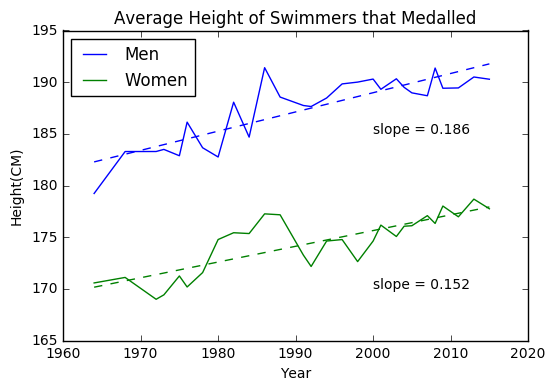

In [500]:
heights = DF[DF['Year']>=1964].groupby(['Year','Gender'])['height'].mean().values
men_heights = []
women_heights = []
for i,h in enumerate(heights):
    if i%2==0:
        men_heights.append(h)
    else:
        women_heights.append(h)
years = sorted(DF[DF['Year']>=1964]['Year'].unique())
plt.plot(sorted(DF[DF['Year']>=1964]['Year'].unique()),men_heights)  
plt.plot(sorted(DF[DF['Year']>=1964]['Year'].unique()),women_heights)       

# plt[0].show()
plt.xlabel('Year')
plt.ylabel('Height(CM)')
plt.title('Average Height of Swimmers that Medalled')
# men_heights
regr_men = linear_model.LinearRegression()
regr_men.fit(np.array(sorted(DF[DF['Year']>=1964]['Year'].unique())).reshape(-1,1), np.array(men_heights))
# print('Coefficients: \n', regr_men.coef_,regr_men.intercept_)
y_men= map(lambda x: regr_men.coef_*x+regr_men.intercept_ , years)
# print y
plt.plot(years,y_men,'b--')
regr_women = linear_model.LinearRegression()
regr_women.fit(np.array(sorted(DF[DF['Year']>=1964]['Year'].unique())).reshape(-1,1), np.array(women_heights))
print('Coefficients: \n', regr_women.coef_,regr_women.intercept_ )
y_women= map(lambda x: regr_women.coef_*x+regr_women.intercept_ , years)
plt.plot(years,y_women,'g--')
plt.annotate('slope = ' + str(regr_men.coef_[0])[:5],(2000,185))
plt.annotate('slope = ' + str(regr_women.coef_[0])[:5],(2000,170))
plt.legend(['Men','Women'],loc = 0)
plt.show()


Coefficients: 
 [ 0.13184501] -242.370196596


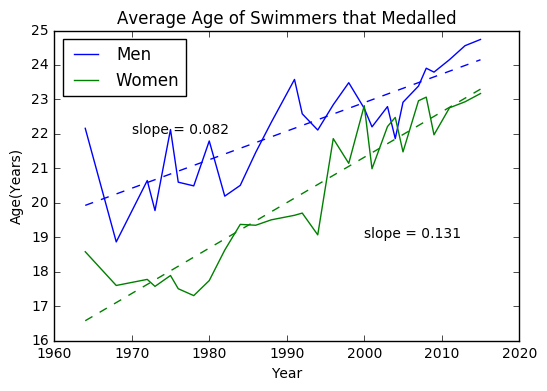

In [504]:
heights = DF[DF['Year']>=1964].groupby(['Year','Gender'])['Age'].mean().values
men_heights = []
women_heights = []
for i,h in enumerate(heights):
    if i%2==0:
        men_heights.append(h)
    else:
        women_heights.append(h)
plt.plot(sorted(DF[DF['Year']>=1964]['Year'].unique()),men_heights)  
plt.plot(sorted(DF[DF['Year']>=1964]['Year'].unique()),women_heights)       

# plt[0].show()
plt.xlabel('Year')
plt.ylabel('Age(Years)')
plt.title('Average Age of Swimmers that Medalled')

# men_heights
regr_men = linear_model.LinearRegression()
regr_men.fit(np.array(sorted(DF[DF['Year']>=1964]['Year'].unique())).reshape(-1,1), np.array(men_heights))
# print('Coefficients: \n', regr_men.coef_,regr_men.intercept_)
y_men= map(lambda x: regr_men.coef_*x+regr_men.intercept_ , years)
# print y
plt.plot(years,y_men,'b--')
regr_women = linear_model.LinearRegression()
regr_women.fit(np.array(sorted(DF[DF['Year']>=1964]['Year'].unique())).reshape(-1,1), np.array(women_heights))
print('Coefficients: \n', regr_women.coef_,regr_women.intercept_ )
y_women= map(lambda x: regr_women.coef_*x+regr_women.intercept_ , years)
plt.plot(years,y_women,'g--')
plt.annotate('slope = ' + str(regr_men.coef_[0])[:5],(1970,22))
plt.annotate('slope = ' + str(regr_women.coef_[0])[:5],(2000,19))
plt.legend(['Men','Women'],loc = 0)
plt.show()



In [505]:
# DF[DF['Year']>=1976].groupby(['Stroke','Gender'])['Age'].mean().hist()
DF[DF['Age']>31]

,Unnamed: 0,Unnamed: 0.1,Age,Athlete,DOB1,Event,Gender,Medal,Year,height,Distance,Stroke
91,91,91,34.041096,"KAHANAMOKU, Duke Paoa","August 24, 1890",100m freestyle,Men,Silver,1924,185.42,100,freestyle
95,95,95,33.323288,"DE BEAUREPAIRE, Frank","May 13, 1891",1500m freestyle,Men,Bronze,1924,NaN,1500,freestyle
562,562,562,31.534247,"KUZNETSOV, Viktor","February 25, 1949",100m backstroke,Men,Silver,1980,NaN,100,backstroke
955,955,955,33.402740,"TORRES, Dara","April 15, 1967",100m freestyle,Women,Bronze,2000,180.34,100,freestyle
1006,1006,1006,33.402740,"TORRES, Dara","April 15, 1967",50m freestyle,Women,Bronze,2000,180.34,50,freestyle
1027,1027,1027,31.041096,"DE BRUIJN, Inge","August 24, 1973",100m butterfly,Women,Bronze,2004,177.80,100,butterfly
1111,1111,1111,32.824658,"LEZAK, Jason","November 12, 1975",100m freestyle,Men,Bronze,2008,193.04,100,freestyle
1167,1167,1167,41.408219,"TORRES, Dara","April 15, 1967",50m freestyle,Women,Silver,2008,180.34,50,freestyle
1186,1186,15,31.813699,Alexander Popov,"November 16, 1971",50 metre freestyle,Men,Gold,2003,198.12,50,freestyle
1187,1187,16,33.328767,Mark Foster,"May 12, 1970",50 metre freestyle,Men,Silver,2003,198.12,50,freestyle


In [161]:
DF[DF['Athlete']=='TORRES, Dara']
DF[DF['Athlete']=='PHELPS, Michael']
DF[DF['Athlete']=='Michael Phelps']


,Age,Athlete,DOB1,Event,Gender,Medal,Unnamed: 0,Year,height,Distance,Stroke
113,20.186301,Michael Phelps,"June 30, 1985",200 metre freestyle,Men,Gold,113,2005,193.04,200,freestyle
116,22.186301,Michael Phelps,"June 30, 1985",200 metre freestyle,Men,Gold,116,2007,193.04,200,freestyle
120,24.189041,Michael Phelps,"June 30, 1985",200 metre freestyle,Men,Silver,120,2009,193.04,200,freestyle
123,26.189041,Michael Phelps,"June 30, 1985",200 metre freestyle,Men,Silver,123,2011,193.04,200,freestyle
539,18.183562,Michael Phelps,"June 30, 1985",100 metre butterfly,Men,Silver,539,2003,193.04,100,butterfly
542,20.186301,Michael Phelps,"June 30, 1985",100 metre butterfly,Men,Silver,542,2005,193.04,100,butterfly
544,22.186301,Michael Phelps,"June 30, 1985",100 metre butterfly,Men,Gold,544,2007,193.04,100,butterfly
547,24.189041,Michael Phelps,"June 30, 1985",100 metre butterfly,Men,Gold,547,2009,193.04,100,butterfly
550,26.189041,Michael Phelps,"June 30, 1985",100 metre butterfly,Men,Gold,550,2011,193.04,100,butterfly
583,16.183562,Michael Phelps,"June 30, 1985",200 metre butterfly,Men,Gold,583,2001,193.04,200,butterfly


In [156]:
# df[(df['Gender']=='Men') & (df['Medal'] == 'Gold') ]
# df['distance'] = df['Event'].apply(lambda x: str.capitalize(x.split(' ')[0]))
# df['stroke'] = df['Event'].apply(lambda x: str.capitalize(x.split(' ')[1]))
# df['BMI'] = df['weight_lbs'].div(df['height'])

def g(x):
    try:
        return int(x)
    except:
        return 'NA'
df['weight_kg'] = df['weight_kg'].apply(g)
BMI_list = []
for i in range(len(df)):
    try:
        BMI = 1.0*df['weight_kg'].ix[i]/(((1.0*df['height'].ix[i])/100)**2)
        BMI_list.append(BMI)
    except:
        BMI_list.append('NA')
df['BMI'] = BMI_list

In [277]:
medal = widgets.SelectMultiple(
    options=['Gold', 'Silver', 'Bronze'],
    value=['Gold'],
    description='Place',
    disabled=False
)
gender = widgets.SelectMultiple(
    options=['Men', 'Women'],
    value=['Men'],
    description='Gender',
    disabled=False
)
distance = widgets.SelectMultiple(
    options=['50m','100m','200m','400m','800m','1500m'],
    value=['100m'],
    description='Distance',
    disabled=False
)
stroke = widgets.SelectMultiple(
    options=['Freestyle', 'Backstroke', 'Butterfly','Breastroke','Individual'],
    value=['Freestyle'],
    description="Stroke",
    disabled=False
)
y_axis = widgets.ToggleButtons(
    options=['height', 'age'],# 'weight', 'BMI', 'PMI'],
    description='Y:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
#     icon='check'
)




def f(x):
    fig = {
        'data': [
            {
                'x': df[(df['Gender']== gender.value) & (df['Medal'] == medal.value) & (df['distance'] == distance.value) &
                       (df['stroke'] == stroke.value)]['Edition'],
                'y': df[(df['Gender']== gender.value) & (df['Medal'] == medal.value) & (df['distance'] == distance.value) &
                       (df['stroke'] == stroke.value)][y_axis.value]
            } 
        ],
        'layout': {
            'xaxis': {'title': 'year'},
            'yaxis': {'title': y_axis.value}
        }
    }
    
    return py.iplot(fig)
seed = widgets.Button()
seed.description = 'Plot Graph'
medal.observe(f,'value')
gender.observe(f,'value')
distance.observe(f,'value')
stroke.observe(f,'value')
y_axis.observe(f,'value')


display(medal)
display(distance)
display(stroke)
display(y_axis)
display(seed)

seed.on_click(f)
# fig = []
fig = {
        'data': [
            {
#                 'x': df[(df['Gender']== gender.value) & (df['Medal'] == medal.value) & (df['distance'] == distance.value) &
#                        (df['stroke'] == stroke.value)]['Edition'],
#                 'y': df[(df['Gender']== gender.value) & (df['Medal'] == medal.value) & (df['distance'] == distance.value) &
#                        (df['stroke'] == stroke.value)][y_axis.value]
                'x': df[df['Gender']==g]['Edition'],
                'y': df[df['Gender']==g]['height'],
            'name': g , 'mode': 'markers',
            } for g in ['Men','Women']
        ],
        'layout': {
            'xaxis': {'title': 'year'},
            'yaxis': {'title': y_axis.value}
        }
    }
# print df[(df['Gender']== gender.value) & (df['Medal'] == medal.value) & (df['distance'] == distance.value) &
#                        (df['stroke'] == stroke.value)]['Edition']
# print 

py.iplot(fig)

The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.


KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

KeyError: 'distance'

In [59]:
df[(df['Gender']== gender.value[0]) & (df['Medal'] == medal.value[0]) & (df['distance'] == distance.value[0]) &
                       (df['stroke'] == stroke.value)]['Edition']

Series([], Name: Edition, dtype: int64)

In [191]:
# print(df.groupby(['Gender'])['age'].mean())
# print(df.groupby(['Gender'])['height'].mean())
# print(df.groupby(['Gender','stroke'])['height'].mean())
# print(df.groupby(['Gender','Edition','stroke'])['height'].mean())
# print(df.groupby(['Gender','Medal'])['height'].mean())
# print(df.groupby(['Gender','stroke'])['age'].mean())
# print(df.groupby(['Gender','distance'])['age'].mean())
# print(df.groupby(['Gender','stroke','distance'])['height'].mean())
(DF[DF['Year']>=1986]).groupby(['Gender','Stroke'])['height'].mean().values

# import matplotlib.pyplot as plt
# df['height'].hist(by = df['Gender'])
# plt.show()


array([ 189.70231405,  185.15584   ,  189.2191453 ,  192.20274074,
        188.21148515,  176.07642857,  175.23603774,  174.71571429,
        177.71207692,  173.90533333])

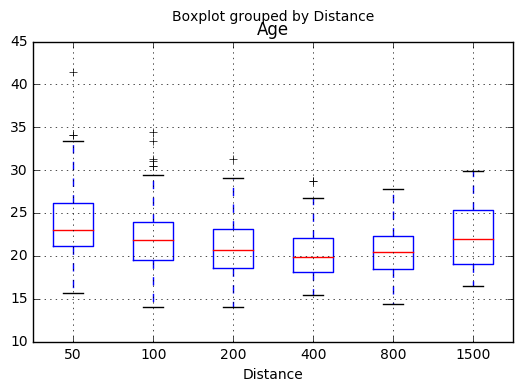

In [512]:
# color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
DF2 = DF[DF['Gender'] == 'Women']
# DF[DF['Year'] >= 1986].hist(column='Age',by= 'Distance' )
DF2[DF2['Year'] >= 1986].boxplot(column='Age',by= 'Distance' )

In [201]:
ages = list(df['age'].values)
for i in range(len(df)):
    if df['age'].ix[i] > 46:
        ages[i] = None
        